In [2]:
# Goal: Predict NO₂ concentration from meteorological and pollutant data.
# Extra: Classify whether a day’s NO₂ level exceeds a WHO-recommended threshold.

In [57]:
# Import dependecies
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
# Load dataset and confirm it's there
df = pd.read_csv("../data/AirQualityUCI.csv", sep=";", decimal=",")
display(df)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning

In [62]:
# Creating a copy for cleaning data and dropping all empty rows
df_drop = df.dropna(how = "all").copy()
display(df_drop)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568,NaN,NaN
9353,04/04/2005,11.00.00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119,NaN,NaN
9354,04/04/2005,12.00.00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406,NaN,NaN
9355,04/04/2005,13.00.00,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139,NaN,NaN


In [64]:
# Change Time format HH.MM.SS to HH:MM:SS
df_drop["Time"] = df_drop["Time"].str.replace(".", ":", regex=False)

# Create a new col by combining Date and Time
df_drop["Datetime"] = pd.to_datetime(df_drop["Date"] + " " + df_drop["Time"], dayfirst=True)

# Set Datetime as index (useful for time series operations)
df_drop.set_index("Datetime", inplace=True)

display(df_drop)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
Datetime,,,,,,,,,,,,,,,,,
2004-03-10 18:00:00,10/03/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
2004-03-10 19:00:00,10/03/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2004-03-10 20:00:00,10/03/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
2004-03-10 21:00:00,10/03/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
2004-03-10 22:00:00,10/03/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-04-04 10:00:00,04/04/2005,10:00:00,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568,NaN,NaN
2005-04-04 11:00:00,04/04/2005,11:00:00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119,NaN,NaN
2005-04-04 12:00:00,04/04/2005,12:00:00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406,NaN,NaN


In [66]:
# Drop columns "Unamed 15" and "Unamed 16" if all entries are NaN
print(f"Before Drop: {list(df_drop.columns.values)}", end="\n\n") # Before drop

unamed_cols = ["Unnamed: 15", "Unnamed: 16"]
for col in unamed_cols:
    if df_drop[col].isna().all():
        df_drop = df_drop.drop(columns=[col])
        
print(f"After Drop: {list(df_drop.columns.values)}") # After drop

Before Drop: ['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16']

After Drop: ['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']


In [68]:
# Values with -200 likekly a placeholder for invalid or missing data
df_drop.replace(-200, np.nan, inplace=True)
display(df_drop)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Datetime,,,,,,,,,,,,,,,
2004-03-10 18:00:00,10/03/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
2004-03-10 19:00:00,10/03/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2004-03-10 20:00:00,10/03/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
2004-03-10 21:00:00,10/03/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
2004-03-10 22:00:00,10/03/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-04-04 10:00:00,04/04/2005,10:00:00,3.1,1314.0,NaN,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
2005-04-04 11:00:00,04/04/2005,11:00:00,2.4,1163.0,NaN,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
2005-04-04 12:00:00,04/04/2005,12:00:00,2.4,1142.0,NaN,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406


In [74]:
# Checking how much data is missing from a given column
missing_percent = df_drop.isna().mean() * 100
missing_table = pd.DataFrame(missing_percent.sort_values(ascending=False), columns=["Missing Values in %"])
display(missing_table)

,Missing Values in %
NMHC(GT),90.231912
CO(GT),17.986534
NO2(GT),17.548360
NOx(GT),17.516298
PT08.S1(CO),3.911510
C6H6(GT),3.911510
PT08.S2(NMHC),3.911510
PT08.S3(NOx),3.911510
PT08.S4(NO2),3.911510
PT08.S5(O3),3.911510


In [76]:
# NMHC(GT) is missing ~90% of its data, so we drop the feature
df_drop.drop(columns=["NMHC(GT)"], inplace=True)

In [78]:
# For the remaining columns, I've decided to impute them with the median if
# the skewness is > 0.5 or < -0.5. Otherwise impute with the means
print(df_drop["NO2(GT)"].skew(), df_drop["NOx(GT)"].skew())

0.6217143134373714 1.7157807992815408


In [80]:
# Imputed remaining columns with the median
# NO2(GT), NOx(GT) and CO(GT) is missing ~17% of its data, replace NaN with median
df_drop["NO2(GT)"] = df_drop["NO2(GT)"].fillna(df_drop["NO2(GT)"].median())
df_drop["NOx(GT)"] = df_drop["NOx(GT)"].fillna(df_drop["NOx(GT)"].median())
df_drop["CO(GT)"] = df_drop["CO(GT)"].fillna(df_drop["CO(GT)"].median())

# Columns missing ~4% of its data, replace NaN with median
remaining_cols = [
    "C6H6(GT)",
    "PT08.S1(CO)",
    "PT08.S2(NMHC)",
    "PT08.S3(NOx)",
    "PT08.S4(NO2)",
    "PT08.S5(O3)",
    "T",
    "RH",
    "AH"
]

for col in remaining_cols:
    df_drop[col] = df_drop[col].fillna(df_drop[col].median())

In [86]:
# Verifying if the data was properly cleaned and imputed
for col in df_drop.columns:
    print(f"NaN's in {col} {df_drop[col].isna().sum()}")

NaN's in Date 0
NaN's in Time 0
NaN's in CO(GT) 0
NaN's in PT08.S1(CO) 0
NaN's in C6H6(GT) 0
NaN's in PT08.S2(NMHC) 0
NaN's in NOx(GT) 0
NaN's in PT08.S3(NOx) 0
NaN's in NO2(GT) 0
NaN's in PT08.S4(NO2) 0
NaN's in PT08.S5(O3) 0
NaN's in T 0
NaN's in RH 0
NaN's in AH 0


In [88]:
# Verifying if the data was properly cleaned and imputed
missing_percent_check = df_drop.isna().mean() * 100
missing_table_check = pd.DataFrame(missing_percent_check.sort_values(ascending=False), columns=["Missing Values in %"])
display(missing_table_check)

,Missing Values in %
Date,0.0
Time,0.0
CO(GT),0.0
PT08.S1(CO),0.0
C6H6(GT),0.0
PT08.S2(NMHC),0.0
NOx(GT),0.0
PT08.S3(NOx),0.0
NO2(GT),0.0
PT08.S4(NO2),0.0


In [119]:
# Feature Engineering


In [90]:
# Created a copy of the cleaned data to avoid modifying the original by reference
D = df_drop.copy()
display(D)

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Datetime,,,,,,,,,,,,,,
2004-03-10 18:00:00,10/03/2004,18:00:00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
2004-03-10 19:00:00,10/03/2004,19:00:00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2004-03-10 20:00:00,10/03/2004,20:00:00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
2004-03-10 21:00:00,10/03/2004,21:00:00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
2004-03-10 22:00:00,10/03/2004,22:00:00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-04-04 10:00:00,04/04/2005,10:00:00,3.1,1314.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
2005-04-04 11:00:00,04/04/2005,11:00:00,2.4,1163.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
2005-04-04 12:00:00,04/04/2005,12:00:00,2.4,1142.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406


## Exploratory Data Analysis (EDA)

Environmental Protection Agency (EPA) — Air Quality and Pollutants:<br>
https://www.epa.gov/criteria-air-pollutants<br>
Covers detailed info about major air pollutants, health effects, sources, and regulation.

World Health Organization (WHO) — Air Pollution:<br>
https://www.who.int/health-topics/air-pollution<br>
Global perspective on health impacts of pollutants including NO₂, O₃, CO, and VOCs.

European Environment Agency (EEA):<br>
https://www.eea.europa.eu/themes/air/air-pollution-sources-1<br>
Good for pollutant sources, concentrations, and environmental impacts.

Wikipedia:<br>
https://en.wikipedia.org/wiki/Nitrogen_oxides<br>
https://en.wikipedia.org/wiki/Carbon_monoxide<br>
https://en.wikipedia.org/wiki/Ozone<br>
https://en.wikipedia.org/wiki/Benzene

In [62]:
# Correlation analysis
# Feature importance evaluation
# Time-series trend analysis

In [92]:
# Exploring all features (except for date and time)
cols_to_explore = []
for col in D.columns:
    if col not in ["Date", "Time"]:
        cols_to_explore.append(col)
print(cols_to_explore)

['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']


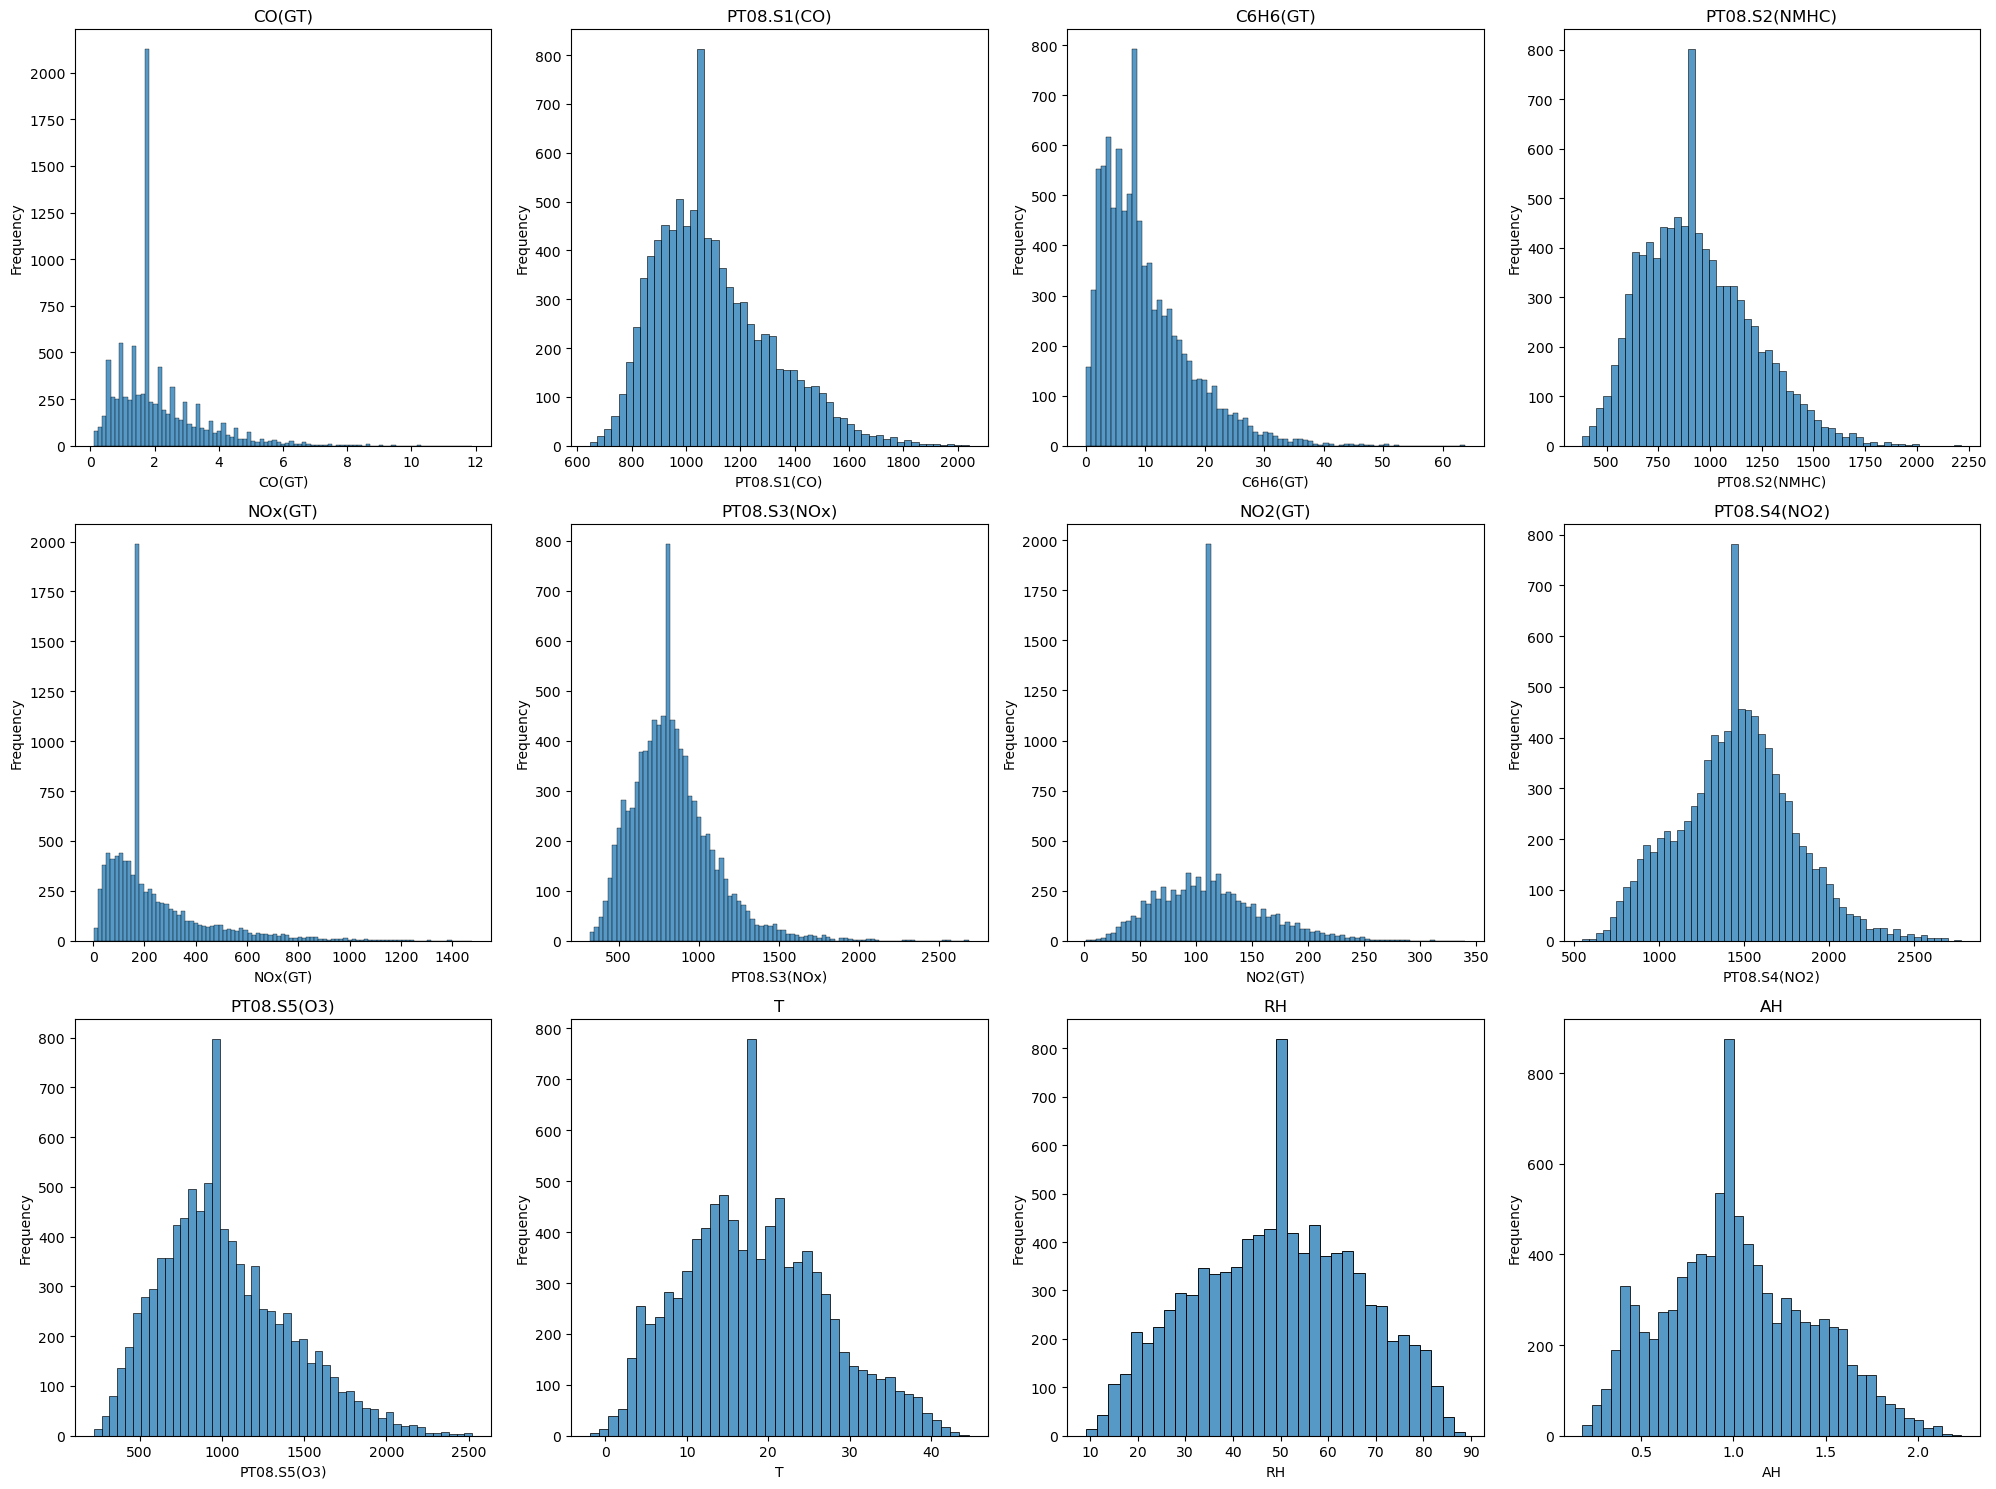

In [133]:
# Histogram
fig, axes = plt.subplots(3, 4, figsize=(20, 15)) 
axes = axes.flatten()  # Flatten to make it easy to iterate

for i, col in enumerate(cols_to_explore):
    sns.histplot(D[col], bins="auto", ax=axes[i]) # change y coords to D[col] to date
    axes[i].set_title(col)
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

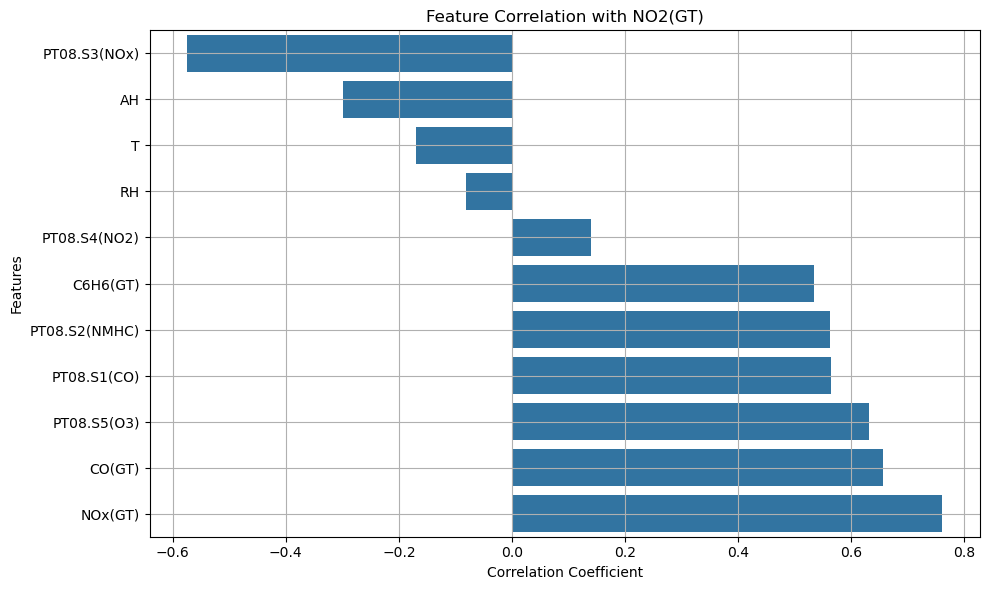

In [189]:
# Bar plot of the correlations between features and NO2(GT)
target_corr = D[cols_to_explore].corr()["NO2(GT)"].drop("NO2(GT)").sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=target_corr.values, y=target_corr.index)
plt.title("Feature Correlation with NO2(GT)")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.grid(True)
plt.tight_layout()
plt.show()

In [247]:
corr_df = target_corr.reset_index()
corr_df.columns = ["Feature", "Correlation with NO2(GT)"]
print(corr_df.to_string(index=False))

      Feature  Correlation with NO2(GT)
 PT08.S3(NOx)                 -0.574181
           AH                 -0.298206
            T                 -0.169380
           RH                 -0.082135
 PT08.S4(NO2)                  0.139986
     C6H6(GT)                  0.533313
PT08.S2(NMHC)                  0.561938
  PT08.S1(CO)                  0.563442
  PT08.S5(O3)                  0.630425
       CO(GT)                  0.656002
      NOx(GT)                  0.760716


In [285]:
# Focusing on features with stronger correlation to NO2, corr > 0.5 to avoid over-interpreting weak/noisy associations
strong_cols_corr = [col for col in target_corr.index if round(abs(target_corr[col]), 3) > 0.5]
print(strong_cols_corr)

['PT08.S3(NOx)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'PT08.S1(CO)', 'PT08.S5(O3)', 'CO(GT)', 'NOx(GT)']


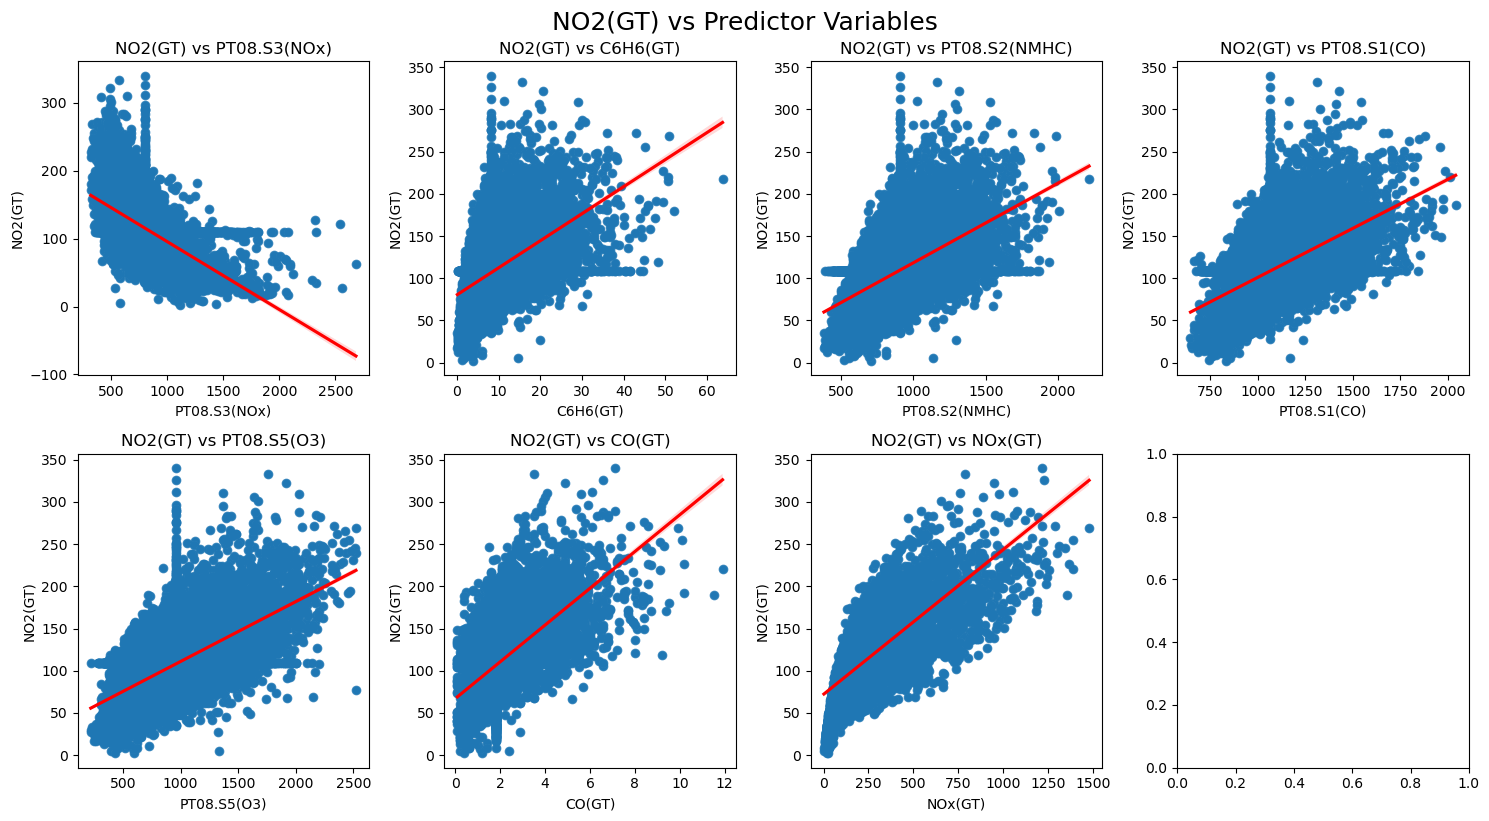

In [299]:
# Scatter plot of all strong cols corr

fig, axes = plt.subplots(2, 4, figsize=(15, 8))
axes = axes.flatten()  # Flatten to make it easy to iterate

for i, col in enumerate(strong_cols_corr):
    # if col != "NO2(GT)":
    sns.scatterplot(data=D, x=col, y="NO2(GT)", ax=axes[i])
    sns.regplot(data=D, x=col, y="NO2(GT)", line_kws={"color":"red"}, ax=axes[i])
    axes[i].set_title(f"NO2(GT) vs {col}")

plt.tight_layout()
plt.suptitle("NO2(GT) vs Predictor Variables", fontsize=18, y=1.02)
plt.show()

In [ ]:
# # Compute correlation
# target_corr = D[cols_to_explore].corr()["NO2(GT)"].drop("NO2(GT)").sort_values()

# # Turn into DataFrame
# corr_df = target_corr.reset_index()
# corr_df.columns = ["Feature", "Correlation with NO2(GT)"]

# # Create side-by-side plot
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={"width_ratios": [2, 1]})

# # --- Barplot on the left ---
# sns.barplot(x="Correlation with NO2(GT)", y="Feature", data=corr_df, ax=ax1, color="skyblue")
# ax1.set_title("Feature Correlation with NO2(GT)")
# ax1.set_xlabel("Correlation Coefficient")
# ax1.set_ylabel("Features")
# ax1.grid(True)

# # --- Table on the right ---
# # Format values for better display
# table_data = corr_df.copy()
# table_data["Correlation with NO2(GT)"] = table_data["Correlation with NO2(GT)"].round(3)

# # Hide axis and add table
# ax2.axis("off")
# table = ax2.table(cellText=table_data.values,
#                   colLabels=table_data.columns,
#                   cellLoc="center",
#                   loc="center")
# table.auto_set_font_size(False)
# table.set_fontsize(10)
# table.scale(1.2, 1.5)

# plt.tight_layout()
# plt.show()

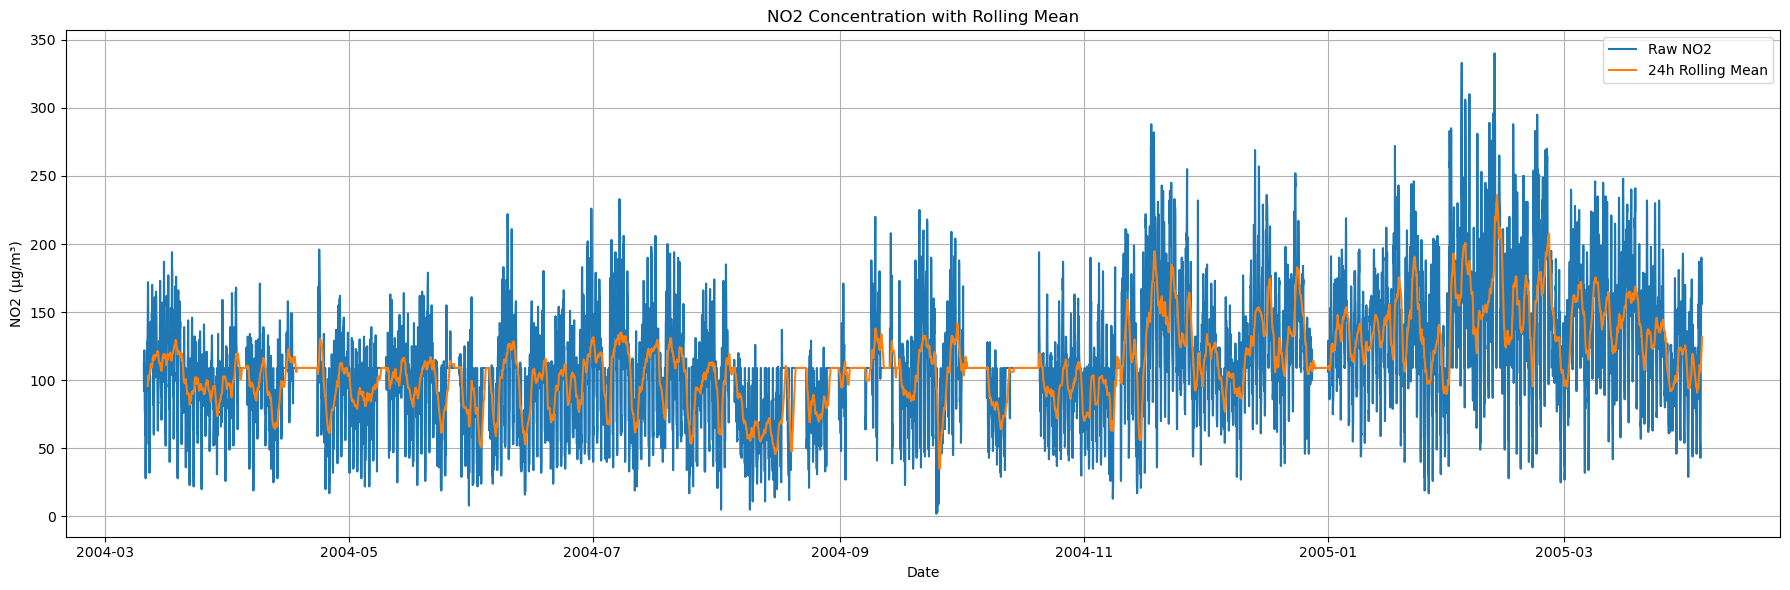

In [116]:
# Time series plot with rolling mean
NO2_rolling_mean = D["NO2(GT)"].rolling(window=24).mean()

plt.figure(figsize=(18, 6))
plt.plot(D.index, D["NO2(GT)"], label="Raw NO2")
plt.plot(D.index, NO2_rolling_mean, label="24h Rolling Mean")
plt.grid(True)
plt.xlabel("Date")
plt.ylabel("NO2 (µg/m³)")
plt.title("NO2 Concentration with Rolling Mean")

plt.legend()
plt.tight_layout()
plt.show()

In [98]:
# Comparing two features

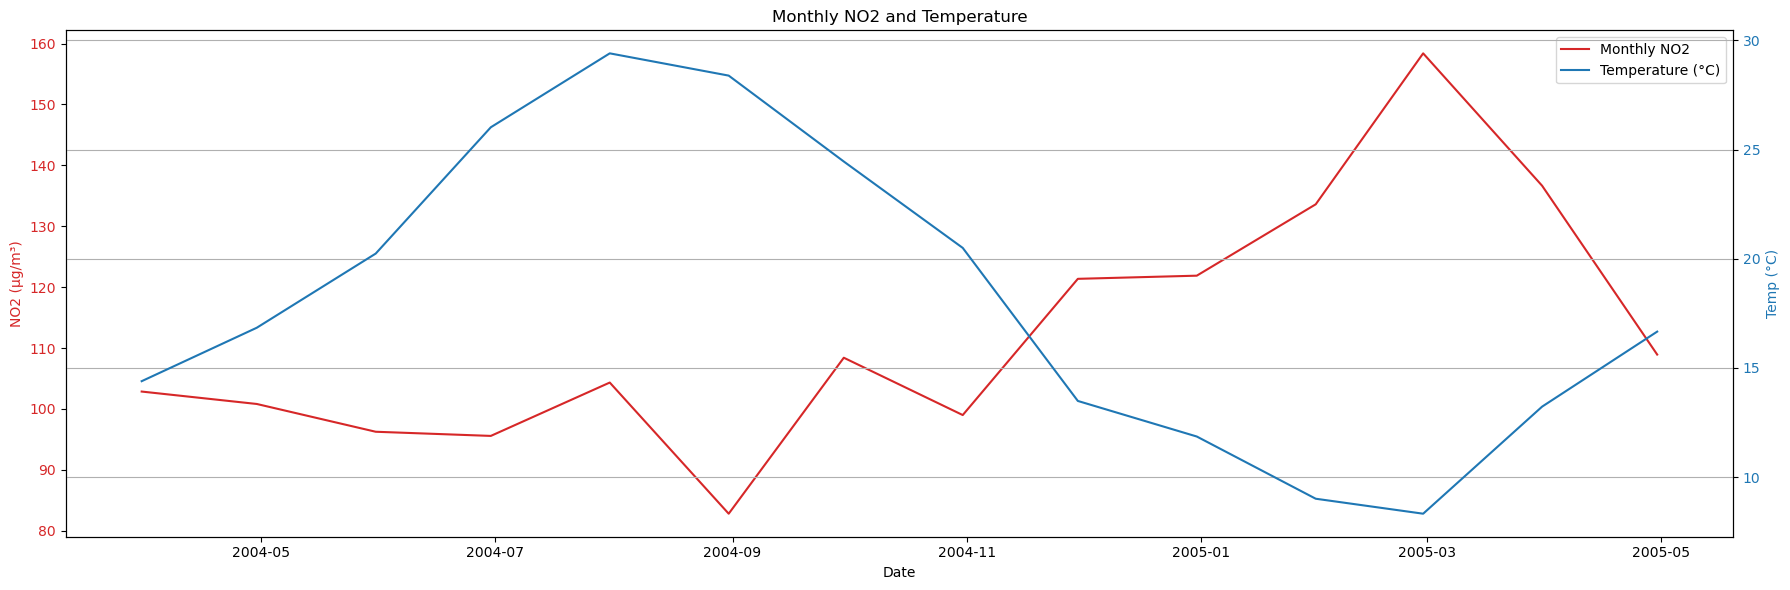

In [30]:
# Comparing Tempature with NO2
monthly_NO2 = D["NO2(GT)"].resample("ME").mean()
monthly_temp = D["T"].resample("ME").mean()

fig, ax1 = plt.subplots(figsize=(18, 6))

# Plot NO2 on left y-axis
ax1.plot(monthly_NO2.index, monthly_NO2, color="tab:red", label="Monthly NO2")
ax1.set_xlabel("Date")
ax1.set_ylabel("NO2 (µg/m³)", color="tab:red")
ax1.tick_params(axis="y", labelcolor="tab:red")

# Creates a second y-axis for temp
ax2 = ax1.twinx()
ax2.plot(monthly_temp.index, monthly_temp, color="tab:blue", label="Temperature (°C)")
ax2.set_ylabel("Temp (°C)", color="tab:blue")
ax2.tick_params(axis="y", labelcolor="tab:blue")

# Combines legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper right")

plt.title("Monthly NO2 and Temperature")
plt.grid(True)
plt.tight_layout()
plt.show()

*fig X*: Shows the correlation between monthly NO2 concentration and Temperature, where NO2 rises when Temps drops in winter and vise versa

In [109]:
# Correct correlation on monthly averages
from scipy.stats import pearsonr, spearmanr

# Drop any months where either NO2 or Temp is NaN
monthly_NO2 = D["NO2(GT)"].resample("ME").mean()
monthly_temp = D["T"].resample("ME").mean()

# Pearson and Spearman on monthly means
pearson_corr, pearson_p = pearsonr(monthly_temp, monthly_NO2)
spearman_corr, spearman_p = spearmanr(monthly_temp, monthly_NO2)

print(f"Pearson correlation: {pearson_corr:.3f}, p-value: {pearson_p:.3g}")
print(f"Spearman correlation: {spearman_corr:.3f}, p-value: {spearman_p:.3g}")

Pearson correlation: -0.788, p-value: 0.000825
Spearman correlation: -0.815, p-value: 0.000379


A strong and statistically significant negative correlation was found between monthly average temperature and NO₂ concentrations (Pearson: -0.788, p = 0.0008). This confirms that the inverse relationship observed in the plot is not due to random variation but reflects a real seasonal pattern: higher temperatures are associated with lower NO₂ levels, and vice versa.

Temperature (T) and NO₂ concentration (NO2(GT)) have a statistically significant but weak negative correlation.<br>
the relationship (however small) is not due to random chance. Since the p-value is tiny we can be extremely confident the correlation isn't just noise. Thus there is a relationship between temperature and NO₂ levels in your dataset.<br>
But since the correlation's weak (the data points are not tightly clustered around a straight line); Temperature does influence NO₂, but it’s one of many factors and other variables like traffic, wind, season, emissions, etc., probably have stronger or additional effects. So, T and NO₂ are connected, but T alone doesn't explain NO₂ very well.

Prediction intervals<br>
Estimating uncertainty of future predictions<br>
More useful than CIs if your model is going to be used for real-world forecasting

In [ ]:
for col in cols_to_explore:
    print(f"{col} max: {D[col].max()}")

In [ ]:
# Ground Truth vs sesnors comparisons
# Correlation heatmaps
# Time series trends of pollutants




# use cross validation (CV) to evaluate how well a predictive model generalizes to an unseen dataset.
# It helps assess the out-of-sample performance by simulating how the model would perform in real-world scenarios.

# What CV is used for:
# Model evaluation: Measure how well a model generalizes.

# Hyperparameter tuning: Choose parameters (e.g. depth of a decision tree) that yield the best average performance.

# Model selection: Compare different modeling approaches (e.g. logistic regression vs. random forest).

# Data preprocessing evaluation: Evaluate steps like imputation or scaling and see what works best.


# But importantly: You must impute only on the training fold, not the full dataset,
# or you'll leak future information into training → which leads to overfitting.

# Future project improvements is to integrate an API real time to predict future air pollutants from the
# Nasa API: https://api.nasa.gov/
# InSight: Mars Weather Service API